In [3]:
using Plots, Interact

In [7]:
# use Interact.jl for sliders via @manipulate
@manipulate for x=-1.9:0.1:2, y=-1.9:0.1:2, z=-1.9:0.1:2
    𝐱 = [x,y,z]
    𝐲 = -norm(𝐱)*[1,0,0] + 𝐱

    scatter3d([𝐱[1]], [𝐱[2]], [𝐱[3]]; label="x", legend=:bottomleft, xlims=(-2,2), ylims=(-2,2), zlims=(-2,2))
    scatter3d!([𝐲[1]], [𝐲[2]], [𝐲[3]]; label="y")
    plot!([0,𝐱[1]], [0,𝐱[2]], [0,𝐱[3]]; arrow=true, label=nothing, linecolor=:blue)
    plot!([0,𝐲[1]], [0,𝐲[2]], [0,𝐲[3]]; arrow=true, label=nothing, linecolor=:red)

    xs, ys = [-2,2], [-2,2]

    Q = nullspace(𝐲')
    a,b = svd(Q[1:2,:]') \ Q[3,:]
    p = (x,y) -> a*x + b*y

    surface!(xs, ys, p.(xs', ys); alpha=0.5)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 40, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(20), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/solver/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/solver/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/solver/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/solver/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/solver/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013e96a770, Task (runnable) @0x000000013e96a770), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.9\",\"-1.8\",\"-1.7\",\"-1.6\",\"-1.5\",\"-1.4\",\"-1.3\",\"-1.2\",\"-1.1\",\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\"]

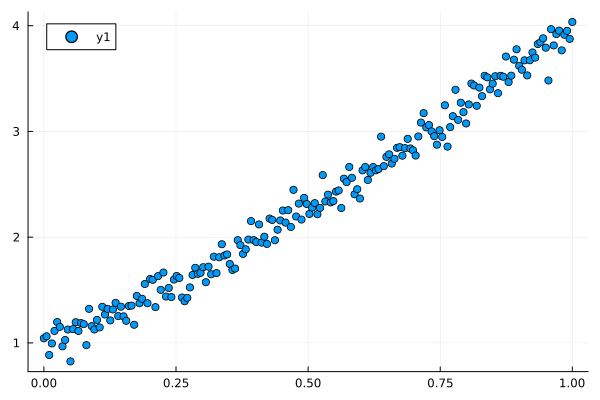

In [12]:
# Lets fit a quadratic function with random noise:

f = x -> x^2 + 2x + 1 + 0.1randn()

m = 200
x = range(0,1; length=m) # makes 1000 evenly spaced points between 0 and 1
𝐟 = f.(x)
scatter(x, 𝐟)

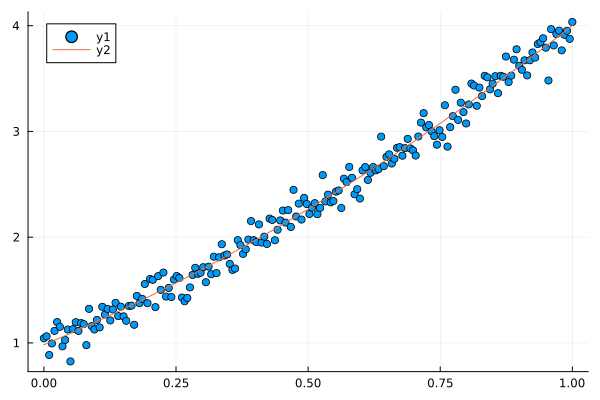

In [13]:
# We want to find the polynomial p(x) = p_0 + p_1*x + p_2*x^2  so that
# p(x[k]) ≈ f(x[k])
# in the sense that norm([p(x[k]) - f(x[k]) for k = 1:m]) == norm(p.(x) -f.(x))
# Make the Vandermonde matrix

V = [x[k]^j for k=1:m, j=0:2]
# Then p.(x) == V*c for c = [p_0,p_1,p_2]
# Thus we want to minimise
# norm(V*c - 𝐟)
# i.e.

c = V \ 𝐟
p = x -> c[1] + c[2]x + c[3]x^2

plot!(x, p.(x))

In [14]:
c

3-element Vector{Float64}:
 0.9824573494310467
 2.110663859653953
 0.9086235029181821